In [1]:
import os
from pathlib import Path
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import shutil

In [2]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = os.path.join(os.path.dirname(main_dir),'dcm_output','mechanical_txt')   
output_dir = os.path.join(main_dir,'analyze_figure')

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "SS_TXT", choose_type = "File")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

file_src_path = selector.run()

Import File : /home/marshall323/桌面/dcm_output/mechanical_txt/ss_A_CASUARIUS_FEMUR_ID[013]_s[56]_x[-70]_y[0]_si_LJ.txt


Plot file saved : ss_A_CASUARIUS_FEMUR_ID[013]_s[56]_x[-70]_y[0]_si_LJ_cruve.png


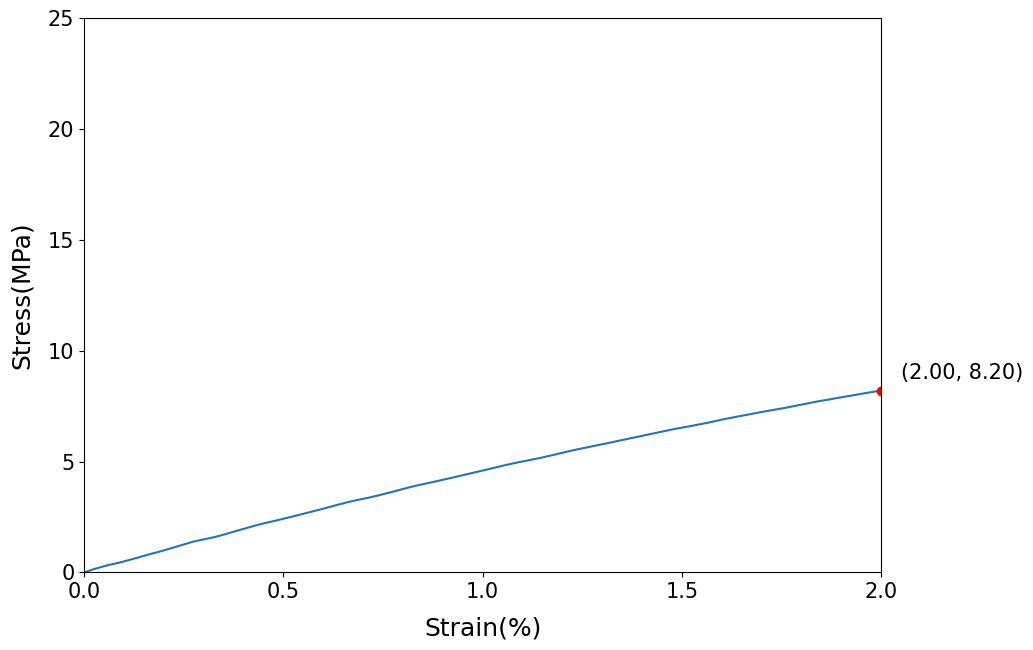

In [3]:
file_name = Path(file_src_path).stem

df = pd.read_csv(file_src_path, sep='\s+')
df = df[pd.to_numeric(df['exx'], errors='coerce').notnull()]
exx = np.array(df['exx'], dtype='float32')
sxx = np.array(df['sxx'], dtype='float32')

fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*1.5)
ax.plot(exx,sxx)

plt.xlim(0, 0.02)
plt.xticks(np.arange(0,0.02+0.005,0.005),fontsize=15)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1,symbol=''))

plt.ylim(0, 25)
plt.yticks(np.arange(0,25+5,5),fontsize=15)

plt.xlabel('Strain(%)',fontsize=18,labelpad=10)
plt.ylabel('Stress(MPa)',fontsize=18,labelpad=10)

plt.plot(float(exx[np.where(sxx==np.max(sxx))]),np.max(sxx),'o',color='red')
plt.annotate("({:.2f}, {:.2f})".format(float(exx[np.where(sxx==np.max(sxx))])*100, np.max(sxx)),
xy=(float(exx[np.where(sxx==np.max(sxx))]),np.max(sxx)),
xytext=(float(exx[np.where(sxx==np.max(sxx))])+0.0005,np.max(sxx)+0.5),fontsize=15) 

save_path = os.path.join(output_dir,'{}_{}.png'.format(file_name,'cruve'))
plt.savefig(save_path, bbox_inches='tight',facecolor = 'white',dpi=100)
print('Plot file saved : {}_{}.png'.format(file_name,'cruve'))

# plt.close()